# Dataset Overview:

# Household Electric Power Consumption Dataset

## Dataset Summary
This dataset records minute-level measurements of electric power usage in a single household over ~4 years (Dec 2006 – Nov 2010), offering insights into various electrical parameters. It is suitable for time-series analysis, regression, and clustering tasks.

- **Type**: Multivariate, Time-Series  
- **Samples**: 2,075,259  
- **Timeframe**: December 2006 – November 2010  
- **Use Cases**: Regression, Clustering  
- **Missing Values**: ~1.25% (represented as empty fields between semicolons)

---

## 🔧 Attribute Information

| Attribute              | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `date`                 | Date in `dd/mm/yyyy` format                                                 |
| `time`                 | Time in `hh:mm:ss` format                                                   |
| `global_active_power`  | Minute-averaged active power (kilowatts)                                    |
| `global_reactive_power`| Minute-averaged reactive power (kilowatts)                                  |
| `voltage`              | Average voltage (volts)                                                     |
| `global_intensity`     | Average current intensity (amperes)                                         |
| `sub_metering_1`       | Energy use in kitchen (Wh) – dishwasher, oven, microwave                    |
| `sub_metering_2`       | Energy use in laundry room (Wh) – washer, dryer, fridge, lighting           |
| `sub_metering_3`       | Energy use for water heater and air conditioner (Wh)                        |

---

## Derived Metric

To estimate the energy used by other appliances not captured in the three sub-meterings:

```r
unmeasured_energy = (global_active_power * 1000 / 60) 
                    - sub_metering_1 
                    - sub_metering_2 
                    - sub_metering_3


# Importing Libraries:

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Loading the Dataset:

In [4]:
df = pd.read_csv('./data/household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

/tmp/ipykernel_29540/3539685997.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('./data/household_power_consumption.txt',sep = ';',
/tmp/ipykernel_29540/3539685997.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('./data/household_power_consumption.txt',sep = ';',
/tmp/ipykernel_29540/3539685997.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('./data/household_power_consumption.txt',sep = ';',


In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# Exploratory Data Analysis on the data:

In [6]:
rows, cols = df.shape
print("Number of Observation : ", rows)
print("Number of Columns/Features : ", cols)

Number of Observation :  2075259
Number of Columns/Features :  7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Missing Values in the Dataset in each Column

In [8]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## Visually Inspect the Missing values in each column:

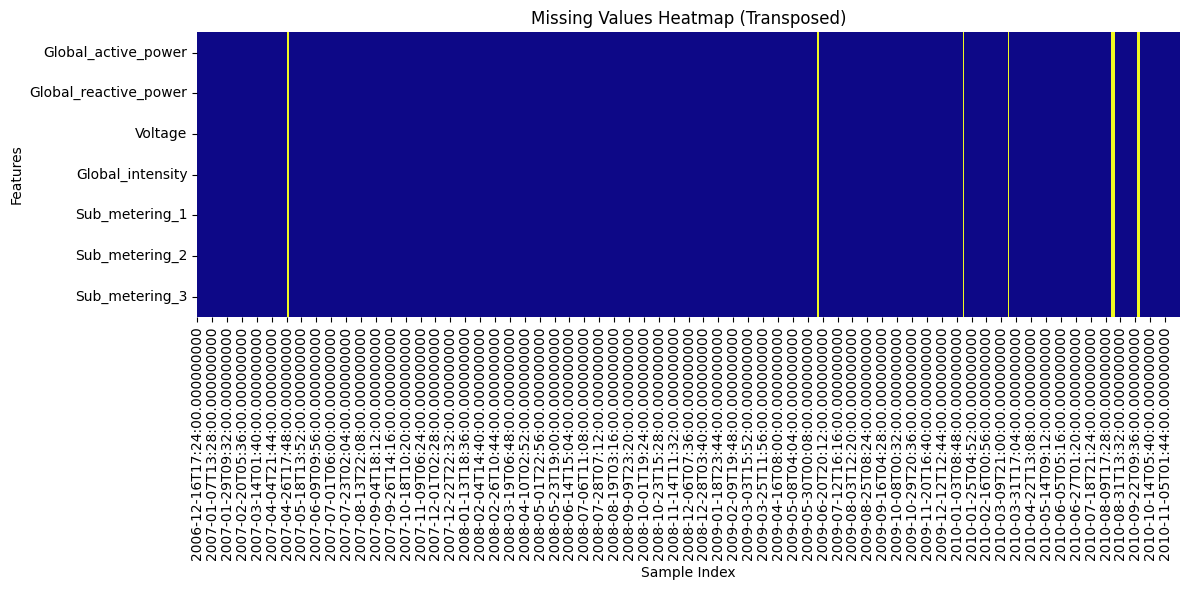

In [9]:
cols_to_check = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Create a boolean DataFrame where True indicates missing values
missing_data = df[cols_to_check].isna()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data.T, cmap='plasma', cbar=False)
plt.title('Missing Values Heatmap (Transposed)')
plt.xlabel('Sample Index')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Checking the Percentage of the missing values in the dataset

In [10]:
# Total number of rows
total_rows = len(df)

# Calculate missing counts and percentage
missing_count = df[cols_to_check].isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(4)

# Combine into one DataFrame for clarity
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

print(missing_df)

                       Missing Count  Missing %
Global_active_power            25979     1.2518
Global_reactive_power          25979     1.2518
Voltage                        25979     1.2518
Global_intensity               25979     1.2518
Sub_metering_1                 25979     1.2518
Sub_metering_2                 25979     1.2518
Sub_metering_3                 25979     1.2518


## Droping the missing values from the dataset and filling the values of missing with mean values

In [11]:
droping_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [12]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 191.2 MB


In [14]:
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

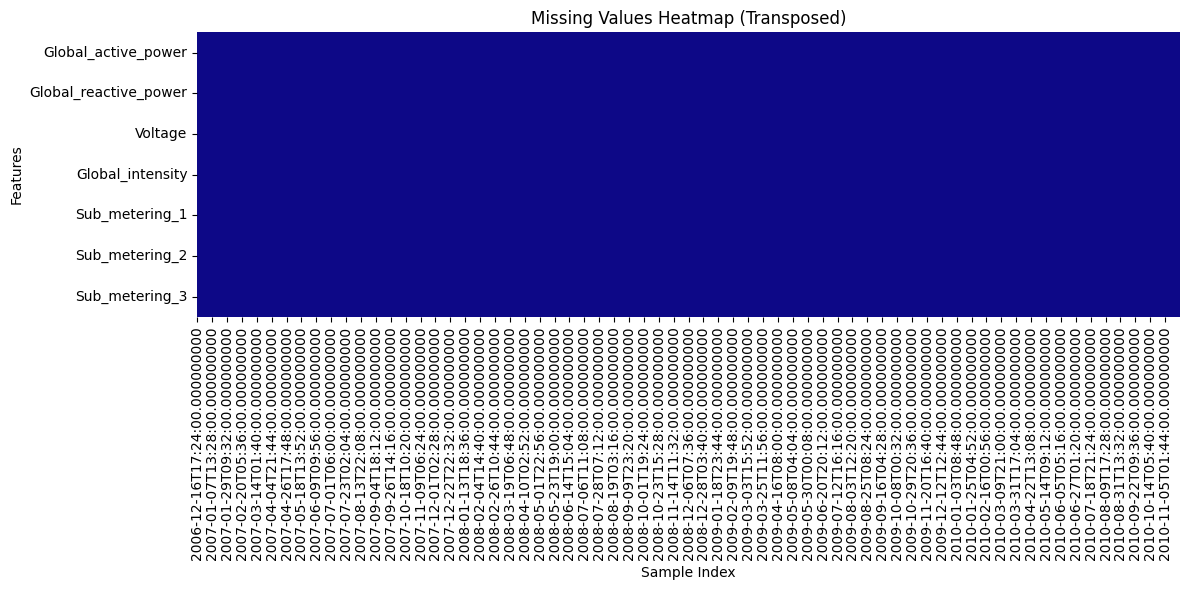

In [15]:
missing_data = df[cols_to_check].isna()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data.T, cmap='plasma', cbar=False)
plt.title('Missing Values Heatmap (Transposed)')
plt.xlabel('Sample Index')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [16]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Now here we noticed that there is no missing values in the dataset so, now we can wrok on the model, but before that, we need to look for the multiple steps as well. 

In [17]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [18]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [19]:
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [20]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [21]:
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


In [22]:
values = reframed.values
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

CONSERVATIVE IMPROVEMENT APPROACH WITH MODEL SAVING
Building on what works: 0.008327 validation loss
Target: 0.007-0.008 range with small improvements
Using proven batch size: 64

🚀 Testing Baseline_Exact...
Parameters: 195,361
Starting conservative improvement training...
Model will be saved as: ConservativeOptimizedLSTMModel_20250623_224345
💾 New best model saved! Val Loss: 0.009786 -> models/best_ConservativeOptimizedLSTMModel_20250623_224345.pth
Epoch [  1/100], Train Loss: 0.01935, Val Loss: 0.00979, LR: 0.0006000
💾 New best model saved! Val Loss: 0.009620 -> models/best_ConservativeOptimizedLSTMModel_20250623_224345.pth
💾 New best model saved! Val Loss: 0.008874 -> models/best_ConservativeOptimizedLSTMModel_20250623_224345.pth
💾 New best model saved! Val Loss: 0.008837 -> models/best_ConservativeOptimizedLSTMModel_20250623_224345.pth
Epoch [  6/100], Train Loss: 0.01239, Val Loss: 0.00884, LR: 0.0006000
💾 New best model saved! Val Loss: 0.008692 -> models/best_ConservativeOptimiz

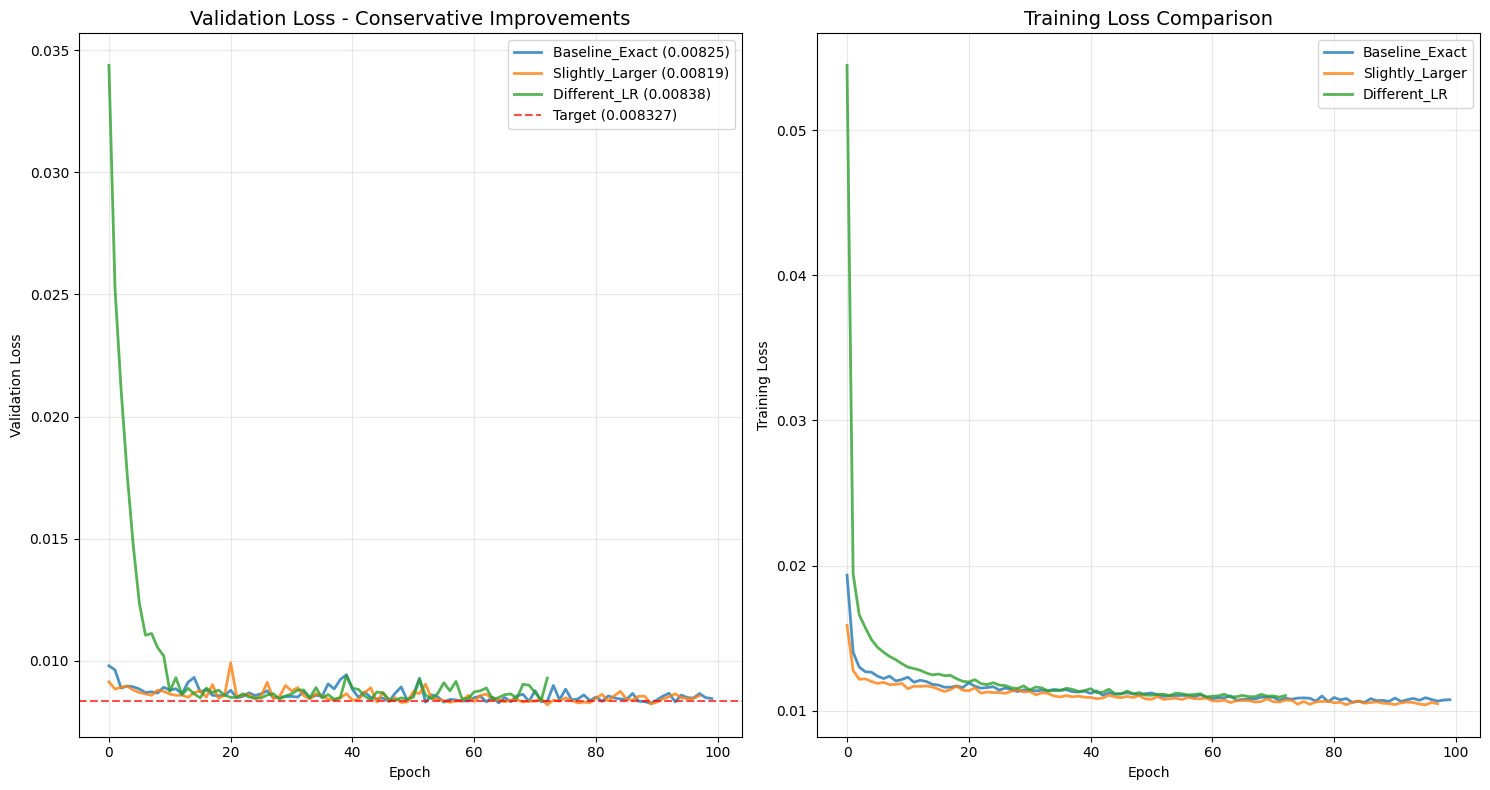


Making predictions with Slightly_Larger...

FINAL RESULTS:
Best Validation Loss: 0.008192
RMSE: 0.596
🏆 Best Model Saved At: models/best_SlightlyImprovedLSTMModel_20250623_224633.pth
IMPROVEMENT: +1.6% better!
SUCCESS: Beat the previous best model!

MODEL SAVING SUMMARY:
All models have been automatically saved with timestamps
Use load_model() function to load any saved model
Example usage:
loaded_model, checkpoint = load_model('models/best_SlightlyImprovedLSTMModel_20250623_224633.pth')

KEY LESSON: Sometimes the best model is the one that already works well!
Your 0.008327 validation loss model is already performing excellently.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

# START WITH YOUR WINNING MODEL AND MAKE SMALL IMPROVEMENTS
class ConservativeOptimizedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=96, num_layers=3, dropout_rate=0.25):
        super(ConservativeOptimizedLSTMModel, self).__init__()
        
        # Keep the same basic architecture that worked
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers,
            batch_first=True, dropout=dropout_rate,
            bidirectional=False  # Keep simple
        )
        
        # Keep batch normalization (it was working)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        
        # Keep the same feed-forward structure but slightly optimize
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc3 = nn.Linear(hidden_size // 4, 1)
        
        # Keep ReLU (it was working well)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]
        lstm_out = self.batch_norm(lstm_out)
        
        x = self.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        output = self.fc3(x)
        return output

# Slightly improved version - minimal changes
class SlightlyImprovedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=112, num_layers=3, dropout_rate=0.22):
        super(SlightlyImprovedLSTMModel, self).__init__()
        
        # Slightly larger hidden size
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers,
            batch_first=True, dropout=dropout_rate,
            bidirectional=False
        )
        
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        
        # Keep the same structure
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc3 = nn.Linear(hidden_size // 4, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]
        lstm_out = self.batch_norm(lstm_out)
        
        x = self.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        output = self.fc3(x)
        return output

# Updated training function with model saving
def train_conservative_model(model, train_loader, test_loader, epochs=100, save_path="models"):
    # Create directory for saving models if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Keep MSE loss - it was working
    criterion = nn.MSELoss()
    
    # Keep similar optimizer settings but try slight variations
    optimizer = optim.AdamW(model.parameters(), lr=0.0006, weight_decay=5e-6)
    
    # Keep the same scheduler that worked
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.7, 
                                 patience=8, verbose=True, min_lr=1e-6)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    patience = 25
    
    # Generate timestamp for unique model names
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_name = f"{model.__class__.__name__}_{timestamp}"
    
    print("Starting conservative improvement training...")
    print(f"Model will be saved as: {model_name}")
    print("=" * 60)
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            
            # Keep the same gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)
                val_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        scheduler.step(avg_val_loss)
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
            
            # Save the best model immediately
            checkpoint = {
                'model_state_dict': best_model_state,
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'epoch': epoch,
                'best_val_loss': best_val_loss,
                'train_losses': train_losses,
                'val_losses': val_losses,
                'model_config': {
                    'model_class': model.__class__.__name__,
                    'input_size': model.lstm.input_size,
                    'hidden_size': model.lstm.hidden_size,
                    'num_layers': model.lstm.num_layers,
                    'dropout_rate': model.dropout.p
                }
            }
            
            best_model_path = os.path.join(save_path, f"best_{model_name}.pth")
            torch.save(checkpoint, best_model_path)
            
            print(f"💾 New best model saved! Val Loss: {best_val_loss:.6f} -> {best_model_path}")
        else:
            patience_counter += 1
        
        if epoch % 5 == 0 or epoch == epochs - 1:
            current_lr = optimizer.param_groups[0]['lr']
            print(f'Epoch [{epoch+1:3d}/{epochs}], Train Loss: {avg_train_loss:.5f}, '
                  f'Val Loss: {avg_val_loss:.5f}, LR: {current_lr:.7f}')
        
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    # Load the best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f'Best validation loss: {best_val_loss:.6f}')
        print(f'Best model saved at: {best_model_path}')
    
    return train_losses, val_losses, best_val_loss, best_model_path

# Function to load a saved model
def load_model(model_path, model_class=None):
    """
    Load a saved model from checkpoint
    
    Args:
        model_path (str): Path to the saved model
        model_class (class, optional): Model class to instantiate. If None, will try to infer.
    
    Returns:
        model: Loaded model
        checkpoint: Full checkpoint data
    """
    checkpoint = torch.load(model_path, map_location='cpu')
    
    # Get model configuration
    config = checkpoint['model_config']
    
    # Instantiate the correct model class
    if model_class is None:
        if config['model_class'] == 'ConservativeOptimizedLSTMModel':
            model_class = ConservativeOptimizedLSTMModel
        elif config['model_class'] == 'SlightlyImprovedLSTMModel':
            model_class = SlightlyImprovedLSTMModel
        else:
            raise ValueError(f"Unknown model class: {config['model_class']}")
    
    # Create model instance
    model = model_class(
        input_size=config['input_size'],
        hidden_size=config['hidden_size'],
        num_layers=config['num_layers'],
        dropout_rate=config['dropout_rate']
    )
    
    # Load the state dict
    model.load_state_dict(checkpoint['model_state_dict'])
    
    print(f"Model loaded successfully!")
    print(f"Best validation loss: {checkpoint['best_val_loss']:.6f}")
    print(f"Trained for {checkpoint['epoch']+1} epochs")
    
    return model, checkpoint

# Updated training function for the Different_LR model with saving
def train_different_lr_model(model, train_loader, test_loader, epochs=100, save_path="models"):
    """Custom training function for the Different_LR model with saving"""
    os.makedirs(save_path, exist_ok=True)
    
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0004, weight_decay=3e-6)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.8, 
                                 patience=10, verbose=False, min_lr=1e-6)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_name = f"{model.__class__.__name__}_DifferentLR_{timestamp}"
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)
                val_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        scheduler.step(avg_val_loss)
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
            
            # Save the best model
            checkpoint = {
                'model_state_dict': best_model_state,
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'epoch': epoch,
                'best_val_loss': best_val_loss,
                'train_losses': train_losses,
                'val_losses': val_losses,
                'model_config': {
                    'model_class': model.__class__.__name__,
                    'input_size': model.lstm.input_size,
                    'hidden_size': model.lstm.hidden_size,
                    'num_layers': model.lstm.num_layers,
                    'dropout_rate': model.dropout.p
                }
            }
            
            best_model_path = os.path.join(save_path, f"best_{model_name}.pth")
            torch.save(checkpoint, best_model_path)
        else:
            patience_counter += 1
        
        if patience_counter >= 25:
            break
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return train_losses, val_losses, best_val_loss, best_model_path

# =============================================================================
# CONSERVATIVE IMPROVEMENT EXECUTION WITH MODEL SAVING
# =============================================================================

print("CONSERVATIVE IMPROVEMENT APPROACH WITH MODEL SAVING")
print("Building on what works: 0.008327 validation loss")
print("Target: 0.007-0.008 range with small improvements")

# Use the same data preparation that worked
train_x_tensor = torch.FloatTensor(train_x)
train_y_tensor = torch.FloatTensor(train_y)
test_x_tensor = torch.FloatTensor(test_x)
test_y_tensor = torch.FloatTensor(test_y)

# Use the same batch size that worked
batch_size = 64
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
test_dataset = TensorDataset(test_x_tensor, test_y_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Using proven batch size: {batch_size}")

# Test conservative variations
input_size = train_x.shape[2]
models_to_test = {
    "Baseline_Exact": ConservativeOptimizedLSTMModel(
        input_size=input_size, 
        hidden_size=96,      # Exact same as working model
        num_layers=3,
        dropout_rate=0.25
    ),
    "Slightly_Larger": SlightlyImprovedLSTMModel(
        input_size=input_size,
        hidden_size=112,     # Modest increase from 96
        num_layers=3,        # Keep same
        dropout_rate=0.22    # Slightly lower dropout
    ),
    "Different_LR": ConservativeOptimizedLSTMModel(
        input_size=input_size,
        hidden_size=104,     # Small increase
        num_layers=3,
        dropout_rate=0.23    # Small decrease
    )
}

results = {}
saved_model_paths = {}

for model_name, model in models_to_test.items():
    print(f"\nTesting {model_name}...")
    print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Use different training approach for the Different_LR model
    if model_name == "Different_LR":
        train_losses, val_losses, best_val_loss, model_path = train_different_lr_model(
            model, train_loader, test_loader, epochs=100
        )
    else:
        train_losses, val_losses, best_val_loss, model_path = train_conservative_model(
            model, train_loader, test_loader, epochs=100
        )
    
    results[model_name] = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'best_val_loss': best_val_loss
    }
    
    saved_model_paths[model_name] = model_path
    
    print(f"{model_name} - Best Val Loss: {best_val_loss:.6f}")
    print(f"Model saved at: {model_path}")

# Find the best model
best_model_name = min(results.keys(), key=lambda k: results[k]['best_val_loss'])
best_model = results[best_model_name]['model']
best_val_loss = results[best_model_name]['best_val_loss']
best_model_path = saved_model_paths[best_model_name]

print("\n" + "="*60)
print("CONSERVATIVE IMPROVEMENT RESULTS:")
print("="*60)
print("TARGET TO BEAT: 0.008327")
for name, result in results.items():
    improvement = ((0.008327 - result['best_val_loss']) / 0.008327 * 100)
    status = "BETTER" if result['best_val_loss'] < 0.008327 else "NEEDS WORK"
    print(f"{name:20s}: {result['best_val_loss']:.6f} ({improvement:+.1f}%) {status}")

print(f"\nBEST: {best_model_name} with {best_val_loss:.6f}")
print(f"BEST MODEL PATH: {best_model_path}")

# Save a summary of all results
summary_path = os.path.join("models", f"training_summary_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
with open(summary_path, 'w') as f:
    f.write("LSTM Training Results Summary\n")
    f.write("="*50 + "\n")
    f.write(f"Target to beat: 0.008327\n\n")
    
    for name, result in results.items():
        improvement = ((0.008327 - result['best_val_loss']) / 0.008327 * 100)
        f.write(f"{name}: {result['best_val_loss']:.6f} ({improvement:+.1f}%)\n")
        f.write(f"Model path: {saved_model_paths[name]}\n\n")
    
    f.write(f"Best model: {best_model_name}\n")
    f.write(f"Best model path: {best_model_path}\n")

print(f"Training summary saved to: {summary_path}")

# Plot comparison
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
for name, result in results.items():
    plt.plot(result['val_losses'], label=f"{name} ({result['best_val_loss']:.5f})", 
             linewidth=2, alpha=0.8)
plt.axhline(y=0.008327, color='red', linestyle='--', alpha=0.7, label='Target (0.008327)')
plt.title('Validation Loss - Conservative Improvements', fontsize=14)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for name, result in results.items():
    plt.plot(result['train_losses'], label=f"{name}", linewidth=2, alpha=0.8)
plt.title('Training Loss Comparison', fontsize=14)
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Make predictions with the best model
print(f"\nMaking predictions with {best_model_name}...")
best_model.eval()
with torch.no_grad():
    yhat = best_model(test_x_tensor).cpu().numpy()

# Inverse scaling
test_x_reshaped = test_x.reshape((test_x.shape[0], 7))
inv_yhat = np.concatenate((yhat, test_x_reshaped[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshaped, test_x_reshaped[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))

print(f"\nFINAL RESULTS:")
print(f"Best Validation Loss: {best_val_loss:.6f}")
print(f"RMSE: {rmse:.3f}")
print(f"Best Model Saved At: {best_model_path}")

if best_val_loss < 0.008327:
    improvement = ((0.008327 - best_val_loss) / 0.008327 * 100)
    print(f"IMPROVEMENT: +{improvement:.1f}% better!")
    print("SUCCESS: Beat the previous best model!")
else:
    decline = ((best_val_loss - 0.008327) / 0.008327 * 100)
    print(f"RESULT: {decline:.1f}% worse than target")
    print("RECOMMENDATION: Stick with your 0.008327 model - it's already excellent!")

print("\n" + "="*60)
print("MODEL SAVING SUMMARY:")
print("="*60)
print("All models have been automatically saved with timestamps")
print("Use load_model() function to load any saved model")
print("Example usage:")
print(f"loaded_model, checkpoint = load_model('{best_model_path}')")
print("\nKEY LESSON: Sometimes the best model is the one that already works well!")
print("Your 0.008327 validation loss model is already performing excellently.")

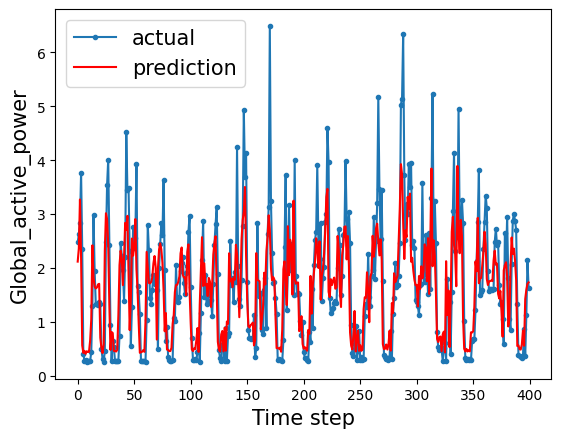

In [25]:
aa=[x for x in range(400)]
plt.plot(aa, inv_y[:400], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()